# Project: NO Show Appointment sourced by Kaggle

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is on the history of medical appointments in Brazil and a log of the attendance.

This analysis will investigate the trends for the patients that showed up for their appointments and those that did not show up, find the factors that are driving this trends and use these factors to predict outcomes for future appointments.

## Questions
1. Which gender makes up the majority of patients that showed up for the appointment? is gender a factor that determines if a patient shows up for an appointment?
2. What other factors will determine if a patient shows up for their appointment or not



In [36]:
#import all packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [37]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

In [39]:
#correct column names
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show': 'Noshow'}, inplace=True)


In [40]:
#change all column names to lower cases
df.rename(columns = lambda x:x.strip().lower(), inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'noshow'],
      dtype='object')

In [41]:
#delete columns not needed
df.drop(['patientid', 'appointmentid', 'hypertension', 'neighbourhood', 'diabetes','alcoholism', 'handicap', 'scholarship'], axis=1, inplace=True)


In [42]:
df.head()

,gender,scheduledday,appointmentday,age,sms_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,No


### Change the gender column and noshow datatype to integer, clean the data in the age column,  strip the timestamp in the scheduled day appointment day to only the day in the month.

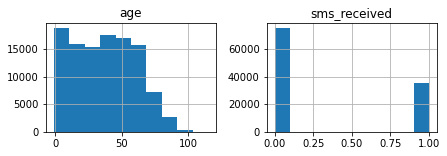

In [51]:
df.hist(figsize=(7, 2));

In [44]:
#check the values in gender column
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
#change the datatype
df.gender = df.gender.apply(lambda x:1 if x=='M' else 0)
df['gender'].unique()

array([0, 1])

In [13]:
#check the values in noshow column
df.noshow.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
#change the datatype
df.noshow = df.noshow.apply(lambda x:1 if x=='No' else 0)
df.noshow.unique()

array([1, 0])

In [15]:
#check the values in age column
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [16]:
#delete ages below 0 and those above 95
df.drop(df[df.age< 0].index, inplace=True)
df.drop(df[df.age >95].index, inplace=True)
df.shape

(110480, 6)

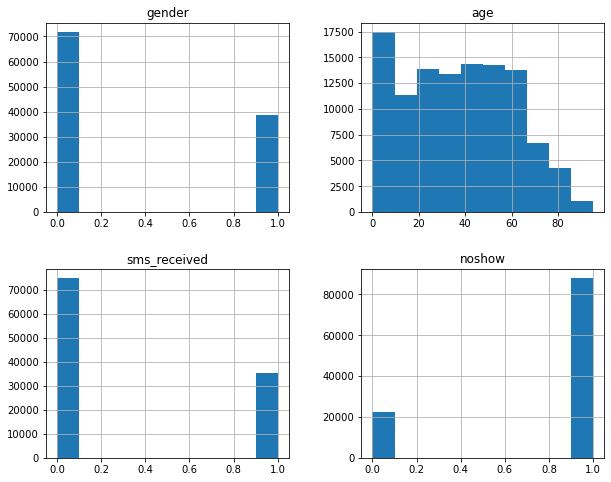

In [17]:
df.hist(figsize=(10,8));

In [18]:
#change appointmentday to day of the week
df['appointmentday']= df['appointmentday']. apply(np.datetime64)
df['appointment']= df['appointmentday'].dt.day
df['scheduledday']= df['scheduledday']. apply(np.datetime64)
df['scheduled']= df['scheduledday'].dt.day

df.head()

,gender,scheduledday,appointmentday,age,sms_received,noshow,appointment,scheduled
0,0,2016-04-29 18:38:08,2016-04-29,62,0,1,29,29
1,1,2016-04-29 16:08:27,2016-04-29,56,0,1,29,29
2,0,2016-04-29 16:19:04,2016-04-29,62,0,1,29,29
3,0,2016-04-29 17:29:31,2016-04-29,8,0,1,29,29
4,0,2016-04-29 16:07:23,2016-04-29,56,0,1,29,29


<a id='eda'></a>
## Exploratory Data Analysis


###  Which gender makes up the majority of patients that showed up for the appointment? is gender a factor that determines if a patient shows up for an appointment?

In [19]:
attended = df.noshow == True
missed = df.noshow == False 

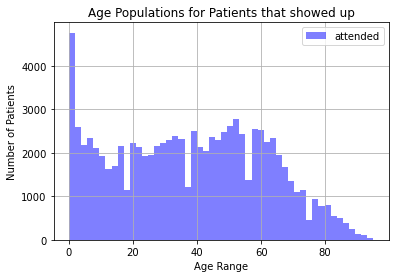

In [20]:
# the number of patients that showed up for their appointment
df.age[attended].hist(alpha=0.5, bins = 50, color='blue', label ='attended')
plt.xlabel('Age Range')
plt.ylabel('Number of Patients')
plt.title('Age Populations for Patients that showed up')
plt.legend();

In the chart above, patients between the ages of 0 to 64 attended their appoinments which accounts for almost 70% of the total patients that showed up for their appoinments.

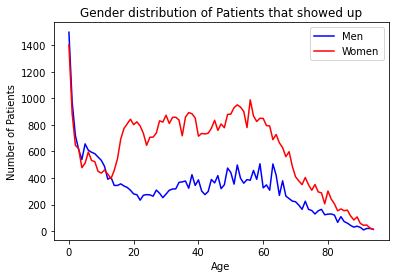

In [25]:
df_age_range = pd.DataFrame()
df_age_range['age'] = range(95)
men_attended = df_age_range.age.apply(lambda x:len(df[(df.age == x) & (df.gender == 1) & (df.noshow == 1)]))
women_attended = df_age_range.age.apply(lambda x:len(df[(df.age == x) & (df.gender == 0) & (df.noshow == 1)]))
plt.plot(range(95), men_attended, color = 'b', label = 'Men')
plt.plot(range(95), women_attended, color = 'r', label = 'Women')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Gender distribution of Patients that showed up')
plt.legend();

Women are the majority of patients that visited the doctor 

The number of women is twice the number of men especially between the ages of 20 and 60 years, probably because women in this age range need more doctor visits for gynae related appointments such as pregnancy, cervical and breast checks. However this wasn't clearly stated in the data. 

In [26]:
men_total = df_age_range.age.apply(lambda x:len(df[(df.age == x) & (df.gender == 1)]))

In [27]:
#get the proportions by dividing the men that showed up by the total number of men 
men_proportion = men_attended / men_total

In [28]:
#get the proportions by dividing the women that showed up by the total number of women
women_total = df_age_range.age.apply(lambda x:len(df[(df.age == x) & (df.gender == 0)]))

In [29]:
women_proportion = women_attended / women_total

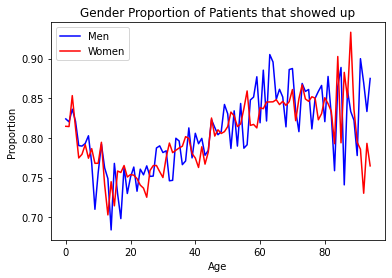

In [30]:
plt.plot(range(95), men_proportion, color = 'b', label = 'Men')
plt.plot(range(95), women_proportion, color = 'r', label ='Women')

plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Gender Proportion of Patients that showed up')
plt.legend();

Irrespective of the fact the number of women is almost twice that of the men, the chart above shows that the proportion of men and women that visited the doctor are the same. 
it also show that 80% patients from the age range between 50 and 80 showed up for their appointments

Gender is not a factor that determines if a pateient will show up for their appointment but Age is a factor.

### What other factors will determine if a patient shows up for their appointment or not

#### SMS Received

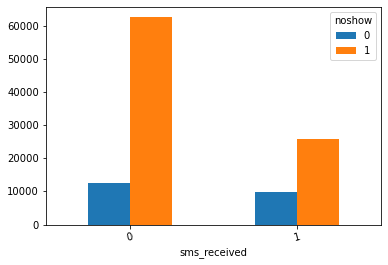

In [31]:
df1 = df.groupby(['sms_received', 'noshow'])['noshow'].count().unstack().plot(kind='bar', rot=15)


#### Appointments scheduled on the day

In [33]:
df['datematch'] = np.where(df.scheduled == df.appointment, 'True', 'False')
df.head()

,gender,scheduledday,appointmentday,age,sms_received,noshow,appointment,scheduled,datematch
0,0,2016-04-29 18:38:08,2016-04-29,62,0,1,29,29,True
1,1,2016-04-29 16:08:27,2016-04-29,56,0,1,29,29,True
2,0,2016-04-29 16:19:04,2016-04-29,62,0,1,29,29,True
3,0,2016-04-29 17:29:31,2016-04-29,8,0,1,29,29,True
4,0,2016-04-29 16:07:23,2016-04-29,56,0,1,29,29,True


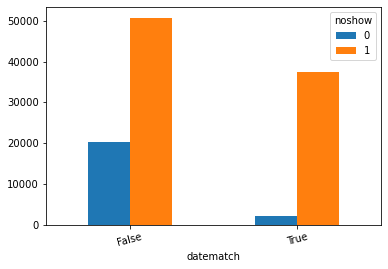

In [34]:
df2 = df.groupby(['datematch', 'noshow'])['noshow'].count().unstack().plot(kind='bar', rot=15)

Most of the patients that made their scheduled their appointment on the day, showed up for their appointment.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!